### 1. Sparse Matrices

Sparse matrices are often useful in numerical simulations when the size of matrix is huge and there are lots if zero values. *SciPy* has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

The most common sparse marices types:
- Coordinate Form (COO)
- List of List (LIL) form
- Compressed-Sparse Column CSC (and row, CSR)

Sparse Matrices: https://matteding.github.io/2019/04/25/sparse-matrices/

In [38]:
import numpy as np
from scipy import *
from scipy.sparse import *

In [39]:
# dense matrix
matrix_d = np.array([
    [1, 0, 0, 0],
    [0, 3, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1]
])

matrix_d

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

When we create a sparse matrix we have to choose which format it should be stored in (CSR, CSC, ...)

In [40]:
# convert from dense to sparse
csr_m = csr_matrix(matrix_d)
csr_m

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [41]:
# printing such matrices is interesting (have elements and its indecies)
print(csr_m)

  (0, 0)	1
  (1, 1)	3
  (2, 1)	1
  (2, 2)	1
  (3, 0)	1
  (3, 3)	1


**We can see that sparse matrix only stores elements that are not equal to zero (i.e. NNZ elements)** 

In [42]:
# from sparse to dense 
csr_m.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int32)

Take into account the fact that `.todense()` method **returns `matrix` not `array`**

### 2. Sparse Matrices Types/Formats

**COO - Coordinate Format**

COO is a **fast format** for constructing sparse matrices (csr/csc)

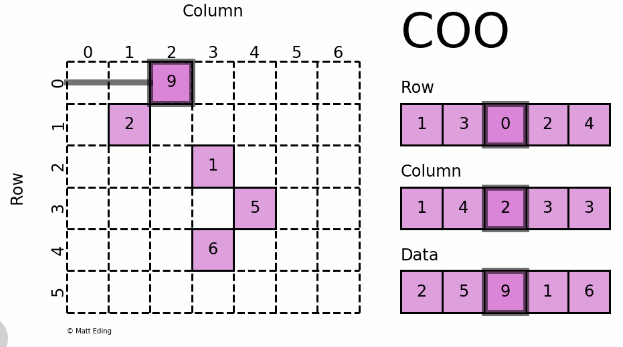

In this case a matrix is represented by 3 vectors:
- `row_indices`: vector that stores row indices of NNZ elements 
- `column_indices`: vector taht stores column indices of NNZ elements
- `data`: vector that stores NNZ elements itself


More about CCO: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix

**COO creation**

In [47]:
# create coo_matrix from array
coo_m = coo_matrix(matrix_d)
coo_m

<4x4 sparse matrix of type '<class 'numpy.int32'>'
	with 6 stored elements in COOrdinate format>

In [136]:
# empty coo_matrix creation
coo_m = coo_matrix((3, 4), dtype=np.int8).toarray()
coo_m

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [150]:
# coo matrix creation using ijv format 
row  = np.array([0, 3, 1, 0, 2, 3])
col  = np.array([0, 3, 1, 2, 1, 1])
data = np.array([4, 5, 7, 9, 1, 22])

coo_m = coo_matrix(
    (data, (row, col)),
    shape=(5, 5)
)

coo_m.toarray()

array([[ 4,  0,  9,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0, 22,  0,  5,  0],
       [ 0,  0,  0,  0,  0]])

**main vectors getting**

In [159]:
# get all non-zero elements (nnz)
coo_data = coo_m.data

# row indexes (e.g. the second non-zero elemnt - 3 has row index 1)
coo_row_idxs = coo_m.row

# column indexes
coo_col_idxs = coo_m.col

print('NNZ: ', coo_data)
print('Row Indices: ', coo_row_idxs)
print('Column Indices: ', coo_row_idxs)

NNZ:  [ 4  5  7  9  1 22]
Row Indices:  [0 3 1 0 2 3]
Column Indices:  [0 3 1 0 2 3]


**Column values getting**

In [155]:
col_indx = 1
values = coo_m.getcol(col_indx)
print(values)

  (1, 0)	7
  (2, 0)	1
  (3, 0)	22


Without transforming to array or matrix we always get values and their indices 

In [156]:
values = coo_m.getcol(1).toarray()
values

array([[ 0],
       [ 7],
       [ 1],
       [22],
       [ 0]], dtype=int32)

**Row values getting**

In [157]:
row_indx = 3
values = coo_m.getrow(row_indx).toarray()
values

array([[ 0, 22,  0,  5,  0]], dtype=int32)

**Slicing is not supported.** Only can get values of a certain row/column 

**LIL - List of List Format**

This is a structure for constructing sparse matrices incrementally (csr/csc)

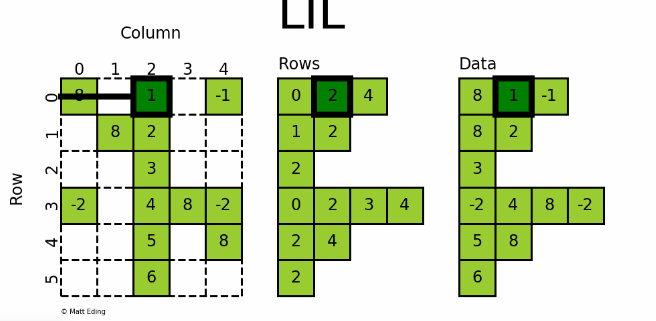

In this case a matrix is represented by 2 arrays:
- `data`: array with NNZ elements (order - start from 0 row till the end)
- `col_indices`: array with column indices of NNZ elements

More about LIL: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.lil_matrix.html#scipy.sparse.lil_matrix

**LIL creation**

In [177]:
# lil creation using array
lil_m = lil_matrix(matrix_d)
lil_m.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]], dtype=int32)

In [178]:
# empty lil_matrix creation
lil_empty = lil_matrix((3, 3), dtype=np.int8)
lil_empty.toarray()

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

**main vectors getting**

In [179]:
# get all non-zero elements (nnz)
lil_data = lil_m.data

# column indices of nnz
lil_indxs = lil_m.rows

print('NNZ: ', lil_data)
print('Column Indices: ', lil_indxs)

NNZ:  [list([1]) list([3]) list([1, 1]) list([1, 1])]
Column Indices:  [list([0]) list([1]) list([1, 2]) list([0, 3])]


**Column/Row values getting**

In [183]:
col_indx = 1
values = lil_m.getcol(col_indx)
values.toarray()

array([[0],
       [3],
       [1],
       [0]], dtype=int32)

In [184]:
row_indx = 3
values = lil_m.getrow(row_indx).toarray()
values

array([[1, 0, 0, 1]], dtype=int32)

**LIL Slicing**

LIL format supports slicing `lil_matrix[row_start : row_end, col_start : col_end]`

In [201]:
lil_m.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]], dtype=int32)

In [200]:
# let's slice values from 3d row and 2d and 3d columns
res = lil_m[2, 1:3].toarray()
res

array([[1, 1]], dtype=int32)

In [206]:
# last element of lil matrix
lil_m[-1, -1]

1

**CSR - Compressed Sparse Row Format**

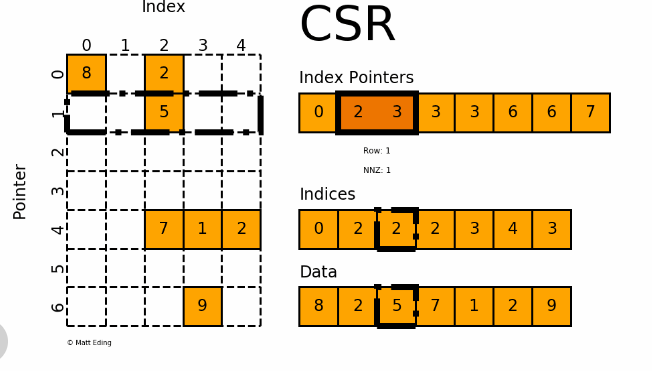

In this case a matrix is represented by 3 vectors:
- `n_nnz_cum`: cumilative number of non-zero elements **in a row** (starting with 0)
- `column_indices`: vector taht stores column indices of the elements 
- `data`: vector that stores elements itself

**The main advantage of CSR - fast row access**

More about CSR: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix

**CSR creation**

In [207]:
# empty csr matrix creation
csr_empty= csr_matrix((3, 4), dtype=np.int8)
csr_empty.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [209]:
# create csr_matrix from array
csr_m = csr_matrix(matrix_d)
csr_m.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]], dtype=int32)

In [210]:
# csr matrix creation using ijv format 
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

csr_m = csr_matrix(
    (data, (row, col)),
    shape=(3, 3)
)

csr_m.toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int32)

**main vectors getting**

In [230]:
# get all non-zero elements (nnz)
csr_data = csr_m.data

# cumilative number of non-zero elements
nnz_cum = csr_m.indptr

# column indexes
csr_col_idxs = csr_m.indices

print('NNZ: ', csr_data)
print('Column Indices: ', csr_col_idxs)
print('NNZ CUM: ', nnz_cum)

NNZ:  [1 2 3 4 5 6]
Column Indices:  [0 2 2 0 1 2]
NNZ CUM:  [0 2 3 6]


**Column/Row values getting**

In [212]:
col_indx = 1
values = csr_m.getcol(col_indx)
values.toarray()

array([[0],
       [0],
       [5]], dtype=int32)

In [214]:
row_indx = 3
values = csr_m.getrow(2).toarray()
values

array([[4, 5, 6]], dtype=int32)

**CSR Slicing**

In [219]:
# last row getting 
csr_m[-1, :].toarray()

array([[4, 5, 6]], dtype=int32)

**CSC - Compressed Sparse Column Format**

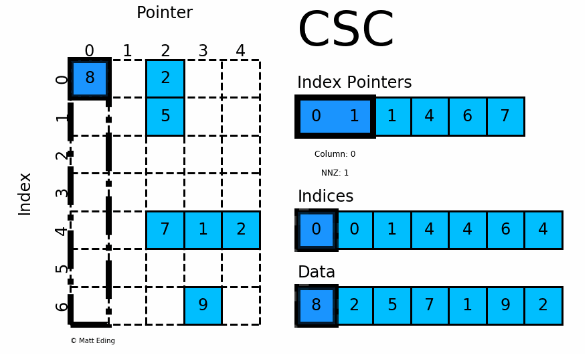

In this case a matrix is represented by 3 vectors:
- `n_nnz_cum`: cumilative number of non-zero elements **in a column** (starting with 0)
- `row_indices`: vector taht stores row indices of the elements 
- `data`: vector that stores elements itself

**The main advantage of CSC - fast column access**

More about CSC: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix

**CSC creation**

In [220]:
# empty csc matrix creation
csc_empty= csc_matrix((3, 4), dtype=np.int8)
csc_empty.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [221]:
# create csr_matrix from array
csc_m = csc_matrix(matrix_d)
csc_m.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]], dtype=int32)

In [233]:
# csc matrix creation using ijv format 
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])

csc_m = csc_matrix(
    (data, (row, col)),
    shape=(3, 3)
)

csc_m.toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int32)

**main vectors getting**

In [235]:
# get all non-zero elements (nnz)
csc_data = csc_m.data

# cumilative number of non-zero elements
nnz_cum = csc_m.indptr

# row indexes
csc_row_idxs = csc_m.indices

print('NNZ: ', csc_data)
print('Row Indices: ', csc_row_idxs)
print('NNZ CUM: ', nnz_cum)

NNZ:  [1 2 3 4 5 6]
Row Indices:  [0 2 2 0 1 2]
NNZ CUM:  [0 2 3 6]


**Column/Row values getting**

In [236]:
col_indx = 1
values = csc_m.getcol(col_indx)
values.toarray()

array([[0],
       [0],
       [3]], dtype=int32)

In [237]:
row_indx = 3
values = csc_m.getrow(2).toarray()
values

array([[2, 3, 6]], dtype=int32)

**CSC Slicing**

In [238]:
# last row getting 
csc_m[-1, :].toarray()

array([[2, 3, 6]], dtype=int32)

### 3. Sparse Matrices Operations

Operations that is applied to dense matrices can be applied for sparse as well. Different formats have different efficiency

**dot product**

In [130]:
print(lil_m.multiply(lil_m).todense())

[[1 0 0 0]
 [0 9 0 0]
 [0 1 1 0]
 [1 0 0 1]]


**addition, multiplication, devision**

Arithmetic operations are applied elemnt-wise

In [131]:
# addition
matrix_sum = csr_m + csr_m
print('Sparse Matrices Addition: \n', matrix_sum.todense())
print()

# multiplication
multiplied_matrix = csr_m * 1000
print('Scalar Multiplication: \n', multiplied_matrix.todense())
print()

# division
div_matrix = csr_m / 2
print('Divided Matrix: \n', div_matrix.todense())

Sparse Matrices Addition: 
 [[2 0 0 0]
 [0 6 0 0]
 [0 2 2 0]
 [2 0 0 2]]

Scalar Multiplication: 
 [[1000    0    0    0]
 [   0 3000    0    0]
 [   0 1000 1000    0]
 [1000    0    0 1000]]

Divided Matrix: 
 [[0.5 0.  0.  0. ]
 [0.  1.5 0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]]


**count non zero**

In [132]:
print('NNZ Count: ', csr_m.count_nonzero())

NNZ Count:  6


**sum**

In [133]:
print('Matrix SUM: ', csr_m.sum())

Matrix SUM:  8


### 4. CSR vs CSC


let's compare where accessing a row will be faster

In [239]:
csr = random(10000, 5000, density=0.05, format='csr')
csr

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2500000 stored elements in Compressed Sparse Row format>

In [240]:
csc = csr.tocsc()
csc

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2500000 stored elements in Compressed Sparse Column format>

Let's simply access each row for csr and csc and find out where it will be faster

In [241]:
%%timeit
for row_index in range(csr.shape[0]):
    useless_row = csr[row_index]

508 ms ± 9.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [242]:
%%timeit
for row_index in range(csc.shape[0]):
    useless_row = csc[row_index]

29.9 s ± 726 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Example above illustrates how we can waste much time by suing wrong data structure**